# Introduction and generalities


The visualization of the results of an analysis typically tell a lot about the quality of the analysis itself, an example is the claim of [superluminal neutrinos](https://arxiv.org/pdf/1109.4897v1.pdf). 

Graphics should convey as much information as possible in an intuitive way. There are plenty of bad examples.

There are essentially two kinds of plots you'll ever want to make, histograms and scatter plots.

### Histograms

Histograms represent scalar functions, $f(x): {\rm I\!R}^n \to {\rm I\!R}$, where at most $n=2$. They are generally used to display the feature of a data distribution. Histograms are often used for comparison among several distributions, for instance, very importantly, histograms are used to compare measurements with expectations (e.g. simulations). 

Histograms are "binned", i.e. the domain is divided in classes (bins), i.e. for the $i$th bin $x_i<x\le x_{i+1}$ and the content of the bin (say $h(x)$) is  $h(x)=\frac{\int_{x_{i}}^{x_{i+1}} f(x)}{x_{i+1}- x_{i}}$. Bins doesn't need to have the same size, i.e. it could well be that ($x_{i+1}- x_{i}) \neq (x_{j+1}- x_{j})$ for $i\neq j$. 
If the bin size is small, $h(x)\simeq f(\frac{x_{i+1}+x_{i}}{2})$.

$f(x)$ itself can be normalized ($\int_{{\rm I\!R}^n} f(x) dx =1$) or not.

Choosing the number of bins and the bins sizes needs a lot of care. Typically the content of each $i$th bin, $N_i$, should be statistically significant, i.e. the corresponding Poisson uncertainty, $1/\sqrt{N_i}$, should be small.

Often such uncertainty is worth being indicated, especially if the distribution is normalized or if the bin content comes from a simulation (and thus needed to be weighted). 


### Scatter plots

Scatter plots are used to compare two quantities, mainly aiming at displaying possible correlations between them. 

Scatter plots can be binned or unbinned, the latter case is often prefered untill the number of point isn't too large. In that case the former is preferred, with a color code indicating the "3rd dimension", i.e. the relative population of each bin.

Display of different population is also possible, marking the data points differently, e.g. with different colors or different markers.

Of paramount importance is the condensation of the scatter plots into "profiles". The procedure runs as follow: data are binned along the $x$ (if you had to bin on the other variable, just invert the axes), for every bin take the mean and the standard deviation of the corresponding $y$ values, display those as data points and their error.
These are also called "box plots".


In [ ]:
from IPython.display import Image
Image("profile.png")

### Other plots

Other kind of plots are there too (e.g. pie-chart), I personally never used them..



# Matplotlib (pyplot)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
import bokeh

A plot is  a hierarchy of nested Python objects. A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

A Figure object is like a container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object

In [ ]:
from IPython.display import Image
Image(url='https://files.realpython.com/media/fig_map.bc8c7cabd823.png')

In [ ]:
fig, _ = plt.subplots()
print (type(fig))

above we created two variables with plt.subplots(). The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object:

In [ ]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print (type(one_tick))

Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib documentation presents this as a figure anatomy, rather than an explicit hierarchy:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

### Stateful Versus Stateless Approaches

There is an important difference between the stateful (state-based, state-machine) and stateless (object-oriented, OO) interfaces.

Above, we used import matplotlib.pyplot as plt to import the pyplot module from matplotlib and name it plt.

Almost all functions from pyplot, such as plt.plot(), are implicitly either referring to an existing current Figure and current Axes, or creating them anew if none exist.

We could say that “plt.plot() is a state-machine interface that implicitly tracks the current figure!” In plain words, this means that:

* The stateful interface makes its calls with plt.plot() and other top-level pyplot functions. There is only ever one Figure or Axes that you’re manipulating at a given time, and you don’t need to explicitly refer to it.
* Modifying the underlying objects directly is the object-oriented approach. We usually do this by calling methods of an Axes object, which is the object that represents a plot itself.

This all boils down to the definition of `plt.plot()` as:
``` python
# matplotlib/pyplot.py
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)

def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)
```

N.B.: the stateless (object-oriented) approach is typically more customizable and comes in handy as graphs become more complex.

### A few simple examples

In [ ]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

In details, that's what has been done above:

* After creating three random time series, one Figure (fig) containing one Axes (a plot, ax) has been defined.

* methods of ax have been called directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.

* tight_layout() applies to the Figure object as a whole to clean up whitespace padding.

In [ ]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')


# either this..
ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
# ..or this
#ax2.hist(x, bins=np.arange(data.min(), data.max()),label='x', alpha=0.5)
#ax2.hist(y, bins=np.arange(data.min(), data.max()),label='y', alpha=0.5)

ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

A few comments:

* As a “1x2” Figure is created, the returned result of plt.subplots(1, 2) is now a Figure object and a NumPy array of Axes objects. Alternatively:

``` python
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
# ax is now a numpy array of axis's
```

* We deal with ax1 and ax2 individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the yaxis belonging to the second Axes, placing its ticks and ticklabels to the right.

* Text inside dollar signs utilizes TeX markup (you can try fancier TeX stuff).

### A more advanced example

Let's consider some data from the housing market in California

In [ ]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

Let's extract a “response” variable $y$, which is an area’s average home value. $pop$ and $age$ are the area’s population and average house age, respectively:

In [ ]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

Let's first create a fancy layout by means of `plt.subplot2grid`

(array([1.530e+02, 1.500e+02, 1.740e+02, 1.970e+02, 2.490e+02, 3.690e+02,
        3.910e+02, 5.660e+02, 6.550e+02, 7.950e+02, 9.440e+02, 9.470e+02,
        1.025e+03, 9.710e+02, 9.140e+02, 9.640e+02, 8.840e+02, 7.970e+02,
        7.410e+02, 7.590e+02, 6.260e+02, 6.010e+02, 5.460e+02, 4.750e+02,
        4.750e+02, 4.210e+02, 3.620e+02, 3.220e+02, 3.360e+02, 2.960e+02,
        2.600e+02, 2.540e+02, 2.110e+02, 1.960e+02, 1.730e+02, 1.440e+02,
        1.330e+02, 1.350e+02, 1.180e+02, 1.170e+02, 1.100e+02, 1.050e+02,
        8.600e+01, 7.800e+01, 6.600e+01, 7.100e+01, 7.400e+01, 6.200e+01,
        5.300e+01, 6.700e+01, 5.900e+01, 5.200e+01, 4.100e+01, 5.800e+01,
        3.500e+01, 3.400e+01, 3.700e+01, 2.300e+01, 3.100e+01, 3.700e+01,
        3.800e+01, 2.700e+01, 3.000e+01, 3.000e+01, 2.200e+01, 1.500e+01,
        2.400e+01, 1.600e+01, 1.900e+01, 1.700e+01, 1.200e+01, 1.700e+01,
        1.500e+01, 1.500e+01, 1.400e+01, 5.000e+00, 6.000e+00, 1.700e+01,
        1.200e+01, 9.000e+00, 6.000e+0

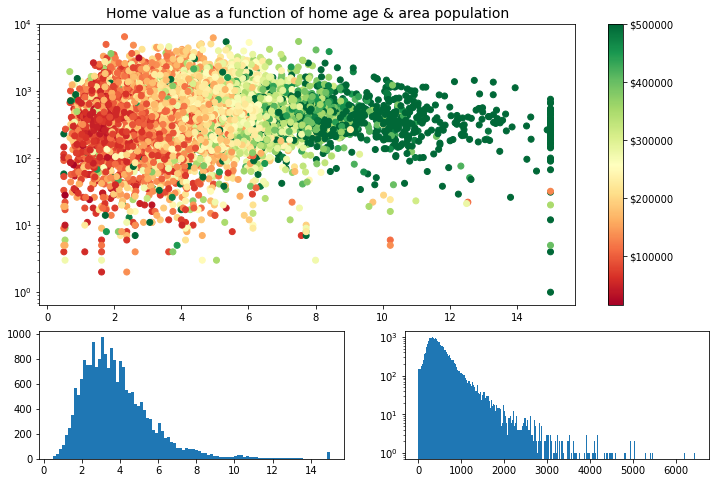

In [33]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
scatter = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(scatter, ax=ax1, format='$%d')
ax1.set_title('Home value as a function of home age & area population', fontsize=14)
ax1.set_yscale('log')

ax2 = plt.subplot2grid(gridsize, (2, 0))
ax2.hist(age, bins='auto')

ax3 = plt.subplot2grid(gridsize, (2, 1))
ax3.hist(pop, bins='auto', log=True)